In [1]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
from scipy.io import wavfile
from PIL import Image
from IPython.display import Audio
import cv2

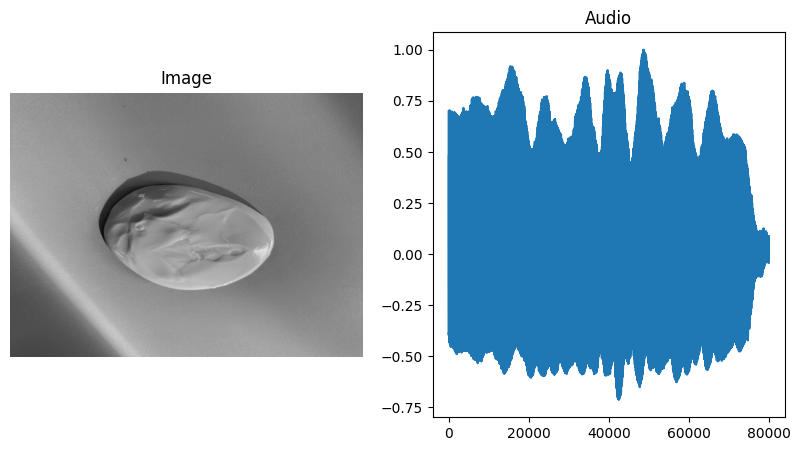

Image shape: (480, 640)
Audio shape: (80000,)


In [3]:
# Load audio file
sample_rate, audio_data = wavfile.read("data/trumpet.wav")

image_size = (640,480)
# Load image file
image = Image.open("data/IMG_5218.JPEG")
image_data = np.array(image.convert('L'))  # Convert to grayscale
image_data = cv2.resize(image_data, image_size)

# Normalize audio data
audio_data = audio_data / np.max(np.abs(audio_data))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_data, cmap='gray')
plt.axis('off')
plt.title('Image')

plt.subplot(1, 2, 2)
plt.plot(audio_data)
plt.title('Audio')
plt.show()

print("Image shape:", image_data.shape)
print("Audio shape:", audio_data.shape)

In [20]:
def plot_everything(image, audio, convo_result, convo_to_audio):
    # Visualize result
    plt.figure(figsize=(20, 10))
    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.plot(audio, color='b')
    plt.title('Audio Signal')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

    plt.subplot(2, 2, 3)
    plt.imshow(convo_result, cmap='gray')
    plt.title('Convolved Result')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.plot(convo_to_audio)
    plt.title('Convo to Audio Signal')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

    plt.show()

## Small scale test

In [19]:
# Ensure dimensions match
audio_test = audio_data[:image_data.shape[0]]

# Perform convolution
convolved_result = convolve2d(image_data, np.expand_dims(audio_test, axis=1), mode='same')

# Normalize result
convolved_result /= np.max(np.abs(convolved_result))

# Convo to audio sum
convo_audio_sum = np.sum(convolved_result, axis=1)
convo_audio_sum = convo_audio_sum / np.max(np.abs(convo_audio_sum))

# Convo to audio std
convo_audio_std = np.std(convolved_result, axis=1)
# convo_audio_std = convo_audio_std / np.max(np.abs(convo_audio_std))
convo_audio_std = (convo_audio_std-np.min(convo_audio_std))/(np.max(convo_audio_std)-np.min(convo_audio_std))
convo_audio_std = (convo_audio_std * 2) - 1


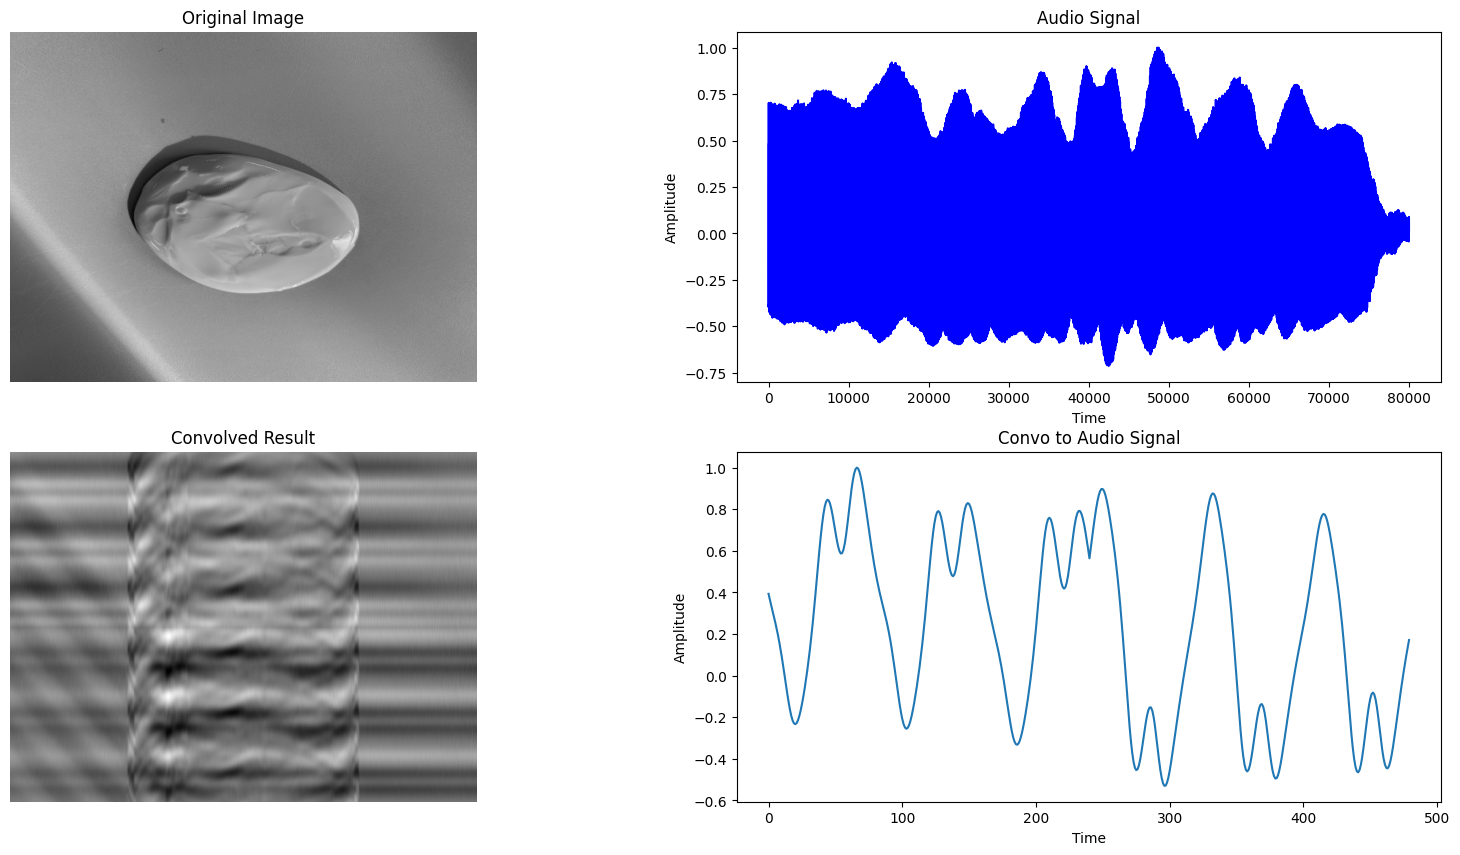

In [21]:
plot_everything(image_data, audio_data, convolved_result, convo_audio_sum)
Audio(data=convo_audio_sum, rate=sample_rate)

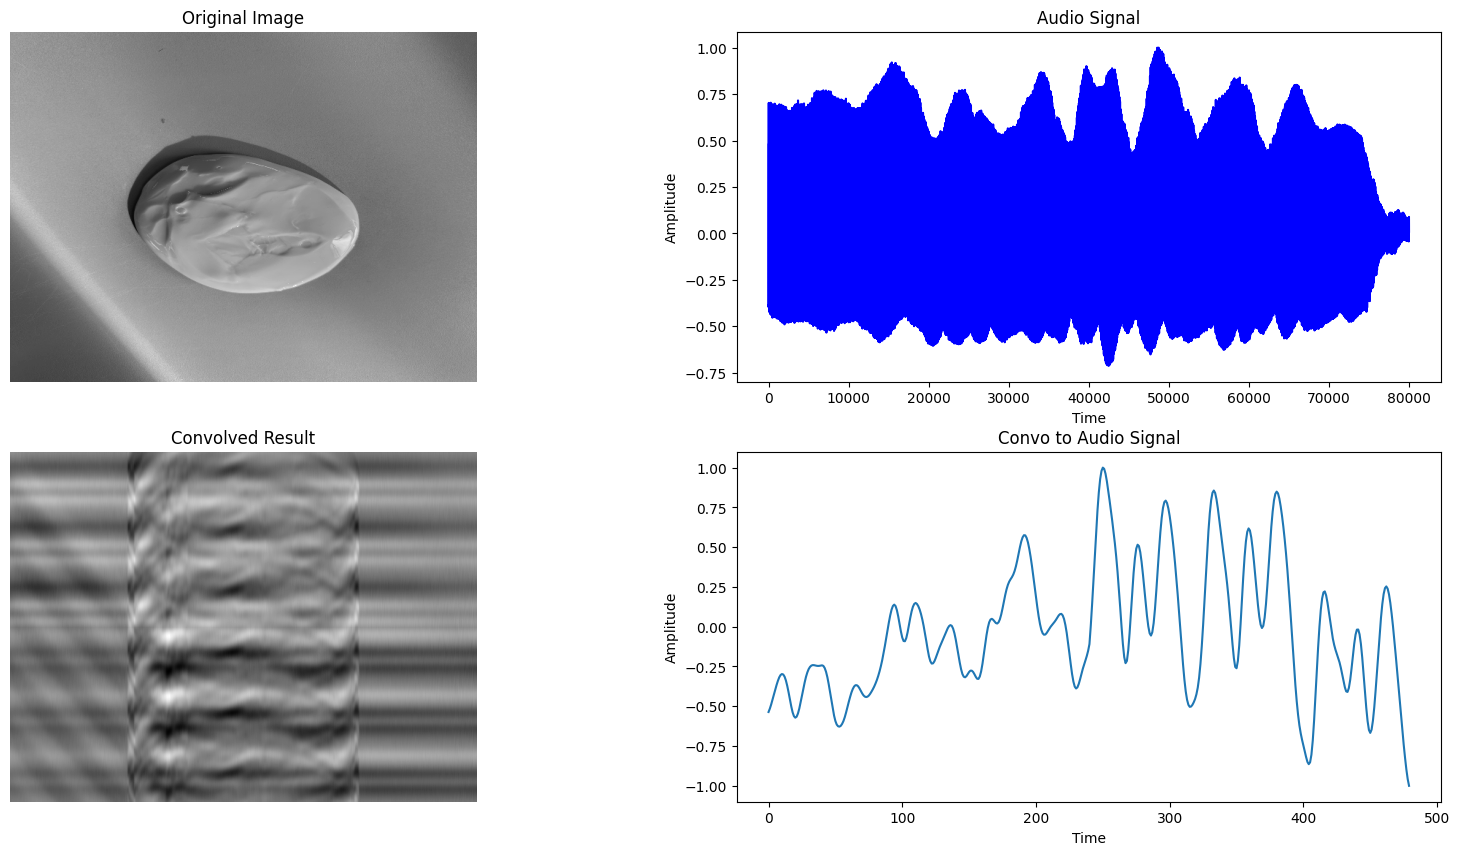

In [22]:
plot_everything(image_data, audio_data, convolved_result, convo_audio_std)
Audio(data=convo_audio_std, rate=sample_rate)


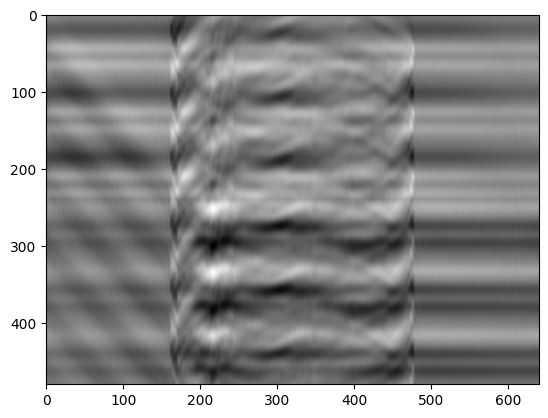

In [23]:
# Library
convolved_result1 = convolve2d(image_data, np.expand_dims(audio_test, axis=1), mode='same')
convolved_result1 /= np.max(np.abs(convolved_result1))

plt.imshow(convolved_result1, cmap='gray')

In [93]:
# Not Library
audio_expanded = np.expand_dims(audio_test, axis=1)
fft_convo = np.fft.fft2(image_data) * np.fft.fft2(audio_expanded)
fft_convo = fft_convo / np.max(np.abs(fft_convo))

convolved_result2 = np.fft.ifft2(fft_convo).real
# convolved_result2 /= np.max(np.abs(convolved_result2))

# Convo to audio sum
convo_audio_sum2 = np.sum(convolved_result2, axis=1)
convo_audio_sum2 = convo_audio_sum2 / np.max(np.abs(convo_audio_sum2))
min = np.min(convo_audio_sum2)
max = np.max(convo_audio_sum2)
convo_audio_sum2 = convo_audio_sum2 - (min + (max-min)/2)

# # Convo to audio std
# convo_audio_std2 = np.std(convolved_result2, axis=1)
# # convo_audio_std = convo_audio_std / np.max(np.abs(convo_audio_std))
# convo_audio_std2 = con
# convo_audio_std2 = (convo_audio_std2 * 2) - 1

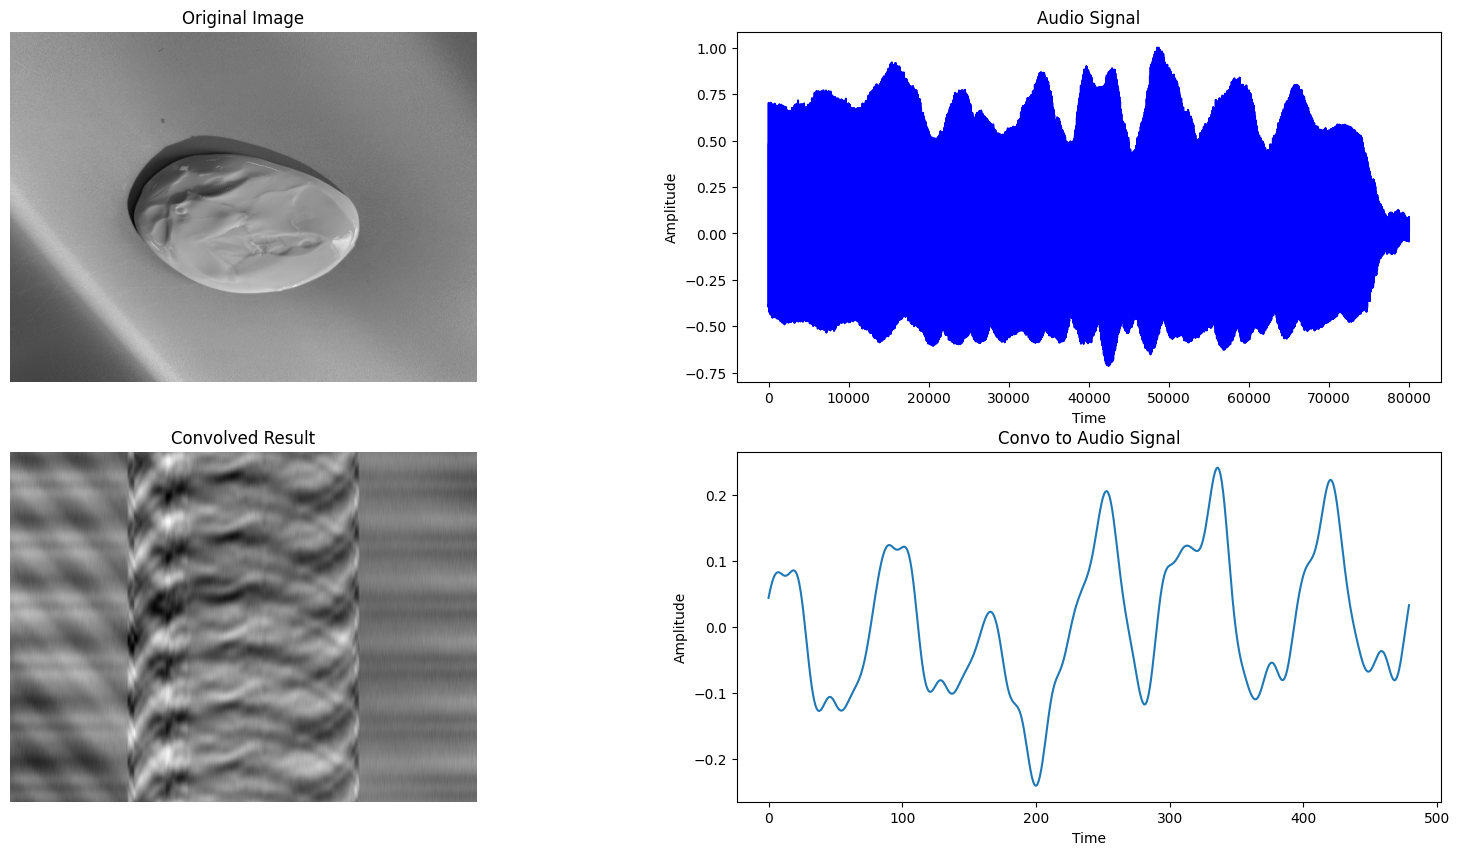

In [94]:

plot_everything(image_data, audio_data, convolved_result2, convo_audio_sum2)
Audio(data=convo_audio_sum2, rate=sample_rate)

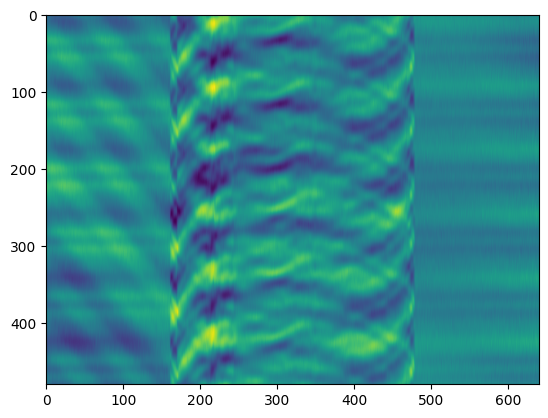

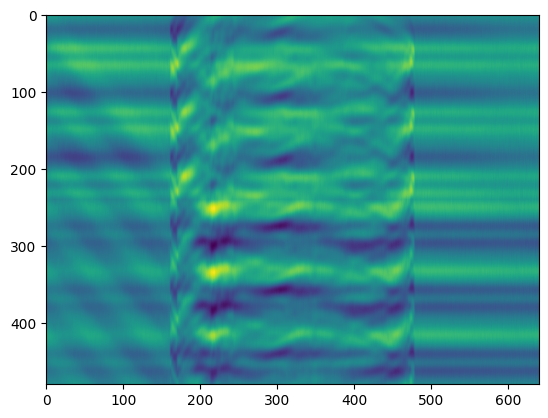

(480, 640)
(480, 640)


In [74]:
plt.imshow(convolved_result2);
plt.show()


plt.imshow(convolved_result);
plt.show()

print(convolved_result2.shape)
print(convolved_result.shape)

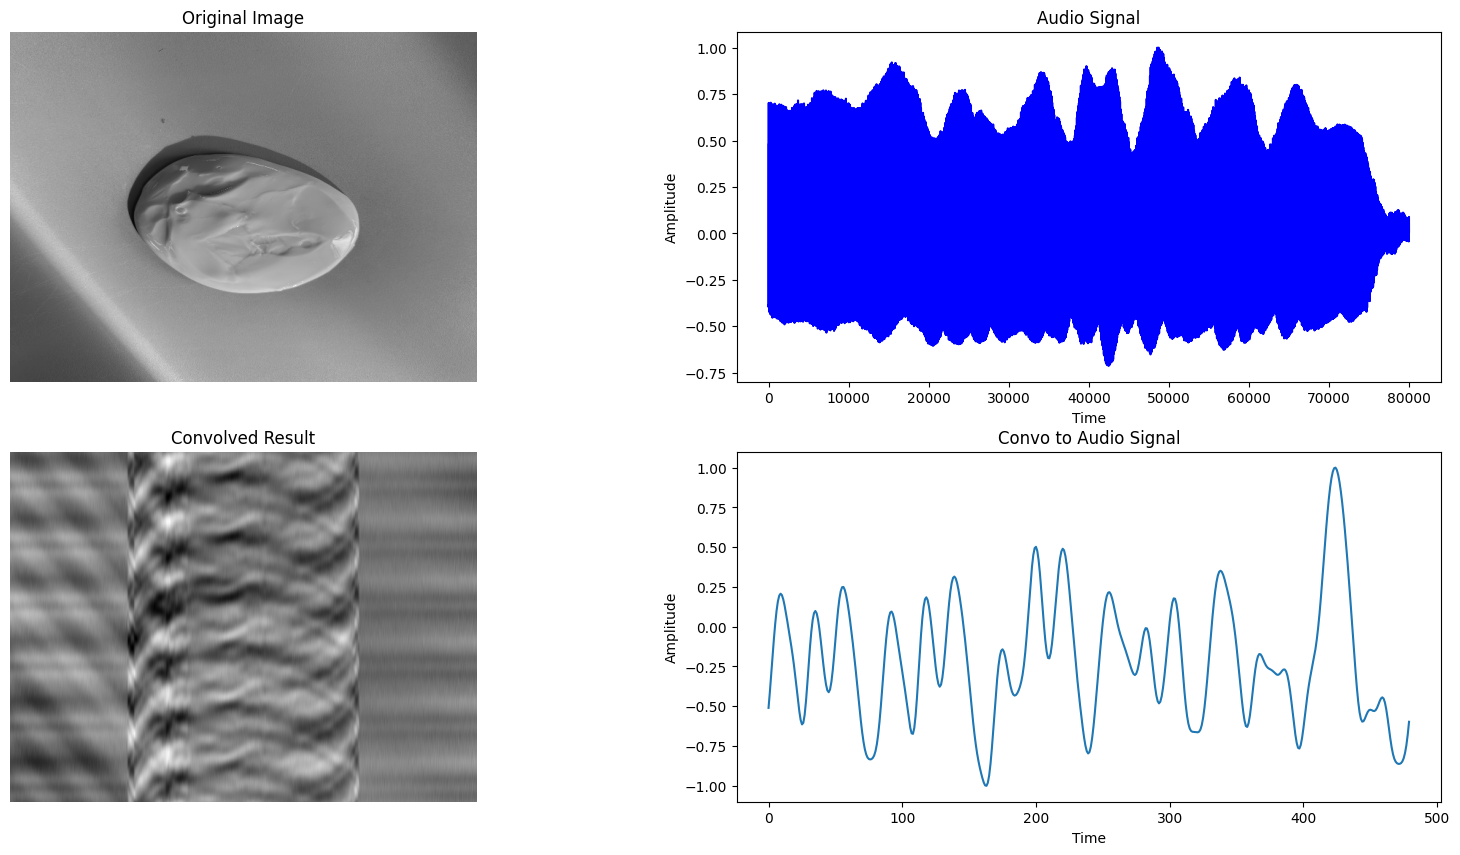

In [32]:
plot_everything(image_data, audio_data, convolved_result2, convo_audio_std2)
Audio(data=convo_audio_std2, rate=sample_rate)

In [103]:
def image_audio_convolve_window_sum(image_fft, audio):
    audio_expanded = np.expand_dims(audio, axis=1)
    audio_expanded_fft = np.fft.fft2(audio_expanded)

    fft_convo = image_fft * audio_expanded_fft # Perform convolution
    time_domain = np.fft.ifft2(fft_convo).real
    result = np.sum(time_domain, axis=1)  # Sum across columns
    result = result / np.max(np.abs(result))
    min = np.min(result)
    max = np.max(result)
    result = result - (min + (max-min)/2)
    result = result * np.hanning(result.shape[0])
    return result

def image_audio_convolve_window_scipy(image, audio):
    audio_expanded = np.expand_dims(audio, axis=1)

    conv = convolve2d(image, audio_expanded, mode='same')
    result = np.sum(conv, axis=1)  # Sum across columns
    return result / np.max(np.abs(result))  # Normalize result

def image_audio_convolve_window_std(image_fft, audio):
    audio_expanded = np.expand_dims(audio, axis=1)
    audio_expanded_fft = np.fft.fft2(audio_expanded)

    fft_convo = image_fft * audio_expanded_fft # Perform convolution
    time_domain = np.fft.ifft2(fft_convo).real

    result = np.std(time_domain, axis=1)  # Sum across columns
    # result = (result-np.min(result))/(np.max(result)-np.min(result))
    # result = (result * 2) - 1
    # return result

    return result / np.max(np.abs(result))  # Normalize result

In [71]:
def image_audio_convolve(image, audio, function):
    # Ensure dimensions match
    if len(audio) < image_data.shape[0]:
        print("Wrogn")
        return
    
    image_fft = np.fft.fft2(image)

    index = 0
    window = image_data.shape[0]
    while index+window < len(audio):
        audio_slice = audio[index:index+window]
        result = function(image_fft, audio_slice)
        if index == 0:
            convolved_result = result
        else:
            convolved_result = np.concatenate((convolved_result, result))
        index += window
   
    return convolved_result

def image_audio_convolve_scipy(image, audio):
    # Ensure dimensions match
    if len(audio) < image_data.shape[0]:
        print("Wrogn")
        return

    index = 0
    window = image_data.shape[0]
    while index+window < len(audio):
        audio_slice = audio[index:index+window]
        result = image_audio_convolve_window_scipy(image, audio_slice)
        if index == 0:
            convolved_result = result
        else:
            convolved_result = np.concatenate((convolved_result, result))
        index += window
   
    return convolved_result

In [45]:
def load(image_path, audio_path): # Load audio file
    sample_rate, audio_data = wavfile.read(audio_path)

    image_size = (640,480)
    # Load image file
    image = Image.open(image_path)
    image_data = np.array(image.convert('L'))  # Convert to grayscale
    image_data = cv2.resize(image_data, image_size)

    # Normalize audio data
    audio_data = audio_data / np.max(np.abs(audio_data))

    return image_data, audio_data

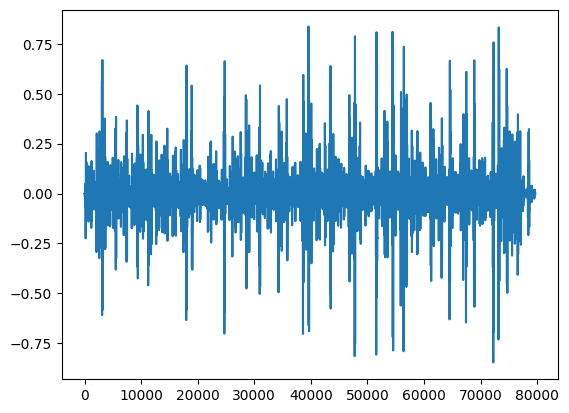

In [104]:
img, aud = load("data/IMG_5218.JPEG", "data/trumpet.wav")
test1 = image_audio_convolve(img, aud, image_audio_convolve_window_sum)
plt.plot(test1)
Audio(data=test1, rate=sample_rate)

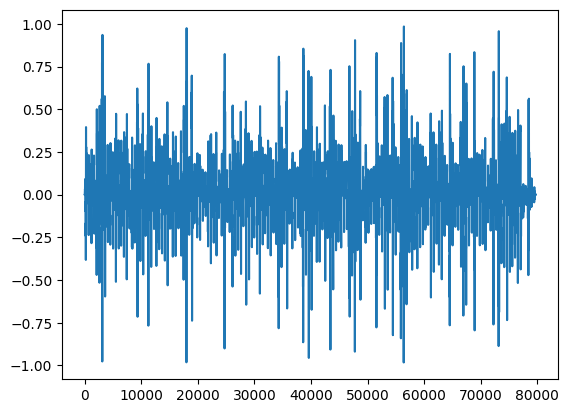

In [105]:
img, aud = load("data/IMG_5222.JPEG", "data/trumpet.wav")
test1 = image_audio_convolve(img, aud, image_audio_convolve_window_sum)
plt.plot(test1)
Audio(data=test1, rate=sample_rate)

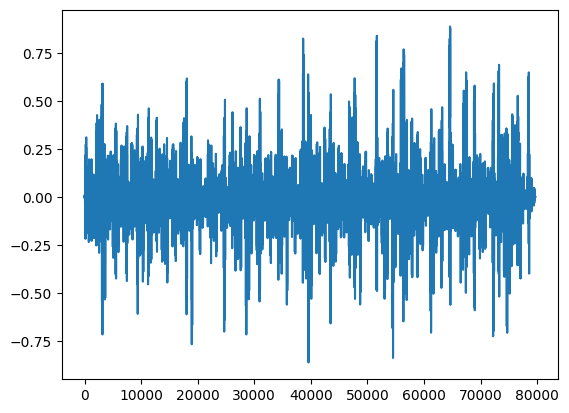

In [106]:
img, aud = load("data/IMG_5229.JPEG", "data/trumpet.wav")
test1 = image_audio_convolve(img, aud, image_audio_convolve_window_sum)
plt.plot(test1)
Audio(data=test1, rate=sample_rate)

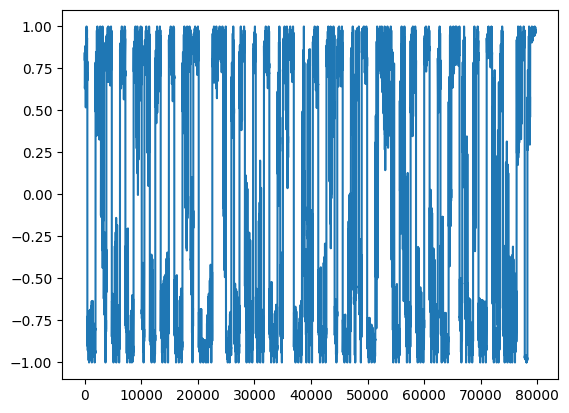

In [48]:
img, aud = load("data/IMG_5218.JPEG", "data/trumpet.wav")
test2 = image_audio_convolve(img, aud, image_audio_convolve_window_sum)
plt.plot(test2)
Audio(data=test2, rate=sample_rate)

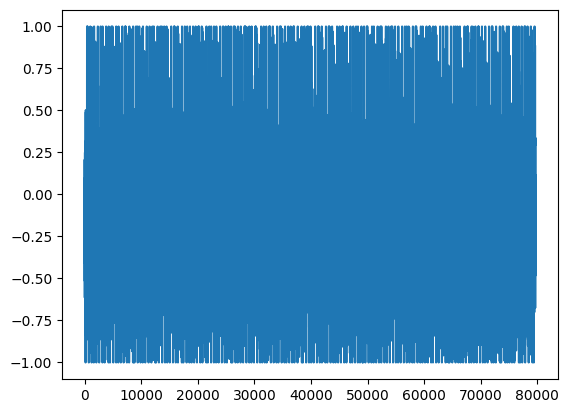

In [43]:
plt.plot(test2)
Audio(data=test2, rate=sample_rate)